In [49]:
import os
os.chdir('/workspaces/projet-iadata')  # Change le répertoire vers la racine
print(os.getcwd())  # Vérif

/workspaces/projet-iadata


In [50]:
# Import des bibliothèques
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Charger les données nettoyées

In [51]:
conso = pd.read_csv('./data/prepared/conso_clean.csv')
meteo = pd.read_csv('./data/prepared/meteo_clean.csv')
print(conso.columns)
print(meteo.columns)


Index(['DateHeure', 'Date', 'Heure', 'ConsommationGazGRTgaz',
       'ConsommationGazTerega', 'ConsommationGazTotale',
       'ConsommationElectricite', 'ConsommationTotale'],
      dtype='object')
Index(['date', 'temperature', 'humidity', 'pressure_sea_level',
       'wind_direction', 'wind_speed', 'min_soil_temp', 'latitude',
       'longitude', 'altitude', 'city_name', 'city_code', 'epci_name',
       'epci_code', 'department_name', 'department_code', 'region_name',
       'region_code', 'month_of_year'],
      dtype='object')


In [52]:
print(conso.head())
print(meteo.head())

                   DateHeure        Date  Heure  ConsommationGazGRTgaz  \
0  2024-04-30T21:00:00+00:00  30/04/2024  23:00                22574.0   
1  2024-04-30T20:00:00+00:00  30/04/2024  22:00                24265.0   
2  2024-04-30T19:00:00+00:00  30/04/2024  21:00                26171.0   
3  2024-04-30T18:00:00+00:00  30/04/2024  20:00                26980.0   
4  2024-04-30T17:00:00+00:00  30/04/2024  19:00                26876.0   

   ConsommationGazTerega  ConsommationGazTotale  ConsommationElectricite  \
0                 1562.0                24136.0                    46363   
1                 1758.0                26023.0                    46046   
2                 1966.0                28137.0                    46335   
3                 2064.0                29044.0                    47090   
4                 2010.0                28886.0                    48479   

   ConsommationTotale  
0             70499.0  
1             72069.0  
2             74472.0  
3 

##### conversion des dates

In [53]:
# Conversion des colonnes en format datetime
conso['Date'] = pd.to_datetime(conso['Date'], dayfirst=True)
conso['DateHeure'] = pd.to_datetime(conso['DateHeure'])
meteo['date'] = pd.to_datetime(meteo['date'])

In [54]:
# Vérification
print(conso[['Date', 'DateHeure']].head())
print(meteo['date'].head())

        Date                 DateHeure
0 2024-04-30 2024-04-30 21:00:00+00:00
1 2024-04-30 2024-04-30 20:00:00+00:00
2 2024-04-30 2024-04-30 19:00:00+00:00
3 2024-04-30 2024-04-30 18:00:00+00:00
4 2024-04-30 2024-04-30 17:00:00+00:00
0   2010-01-01 00:00:00+00:00
1   2010-01-01 03:00:00+00:00
2   2010-01-01 06:00:00+00:00
3   2010-01-01 09:00:00+00:00
4   2010-01-01 12:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]


##### Fusion des fichiers sur la date

In [55]:
# Fusion des données sur DateHeure (conso) et date (meteo)
merged_data = pd.merge(conso, meteo, left_on='DateHeure', right_on='date', how='inner')

# Suppression de la colonne redondante `date` après la fusion
merged_data.drop(columns=['date'], inplace=True)

##### Verification de la fusion

In [56]:
# Vérification du résultat
#print(merged_data.head())
print(merged_data.columns)

Index(['DateHeure', 'Date', 'Heure', 'ConsommationGazGRTgaz',
       'ConsommationGazTerega', 'ConsommationGazTotale',
       'ConsommationElectricite', 'ConsommationTotale', 'temperature',
       'humidity', 'pressure_sea_level', 'wind_direction', 'wind_speed',
       'min_soil_temp', 'latitude', 'longitude', 'altitude', 'city_name',
       'city_code', 'epci_name', 'epci_code', 'department_name',
       'department_code', 'region_name', 'region_code', 'month_of_year'],
      dtype='object')


#### CORRELATION

In [57]:
print(merged_data.dtypes)


DateHeure                  datetime64[ns, UTC]
Date                            datetime64[ns]
Heure                                   object
ConsommationGazGRTgaz                  float64
ConsommationGazTerega                  float64
ConsommationGazTotale                  float64
ConsommationElectricite                  int64
ConsommationTotale                     float64
temperature                            float64
humidity                               float64
pressure_sea_level                     float64
wind_direction                         float64
wind_speed                             float64
min_soil_temp                          float64
latitude                               float64
longitude                              float64
altitude                                 int64
city_name                               object
city_code                               object
epci_name                               object
epci_code                              float64
department_na

#### TRI DES COLONNES
##### GARDER LES COLONNES NUMERIQUES POUR LA CORELATION

In [58]:
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data[numeric_columns].corr()

In [59]:
#Afficher les corelations
print(correlation_matrix)

                         ConsommationGazGRTgaz  ConsommationGazTerega  \
ConsommationGazGRTgaz                 1.000000               0.958934   
ConsommationGazTerega                 0.958934               1.000000   
ConsommationGazTotale                 0.979144               0.945387   
ConsommationElectricite               0.884433               0.859267   
ConsommationTotale                    0.973769               0.941806   
temperature                          -0.772398              -0.808973   
humidity                              0.355221               0.385189   
pressure_sea_level                    0.160167               0.189936   
wind_direction                       -0.027351              -0.012704   
wind_speed                           -0.000503              -0.006959   
min_soil_temp                        -0.710875              -0.720646   
latitude                              0.006242               0.006255   
longitude                             0.003686     

## VISUALISATION DE LA CORRELATION

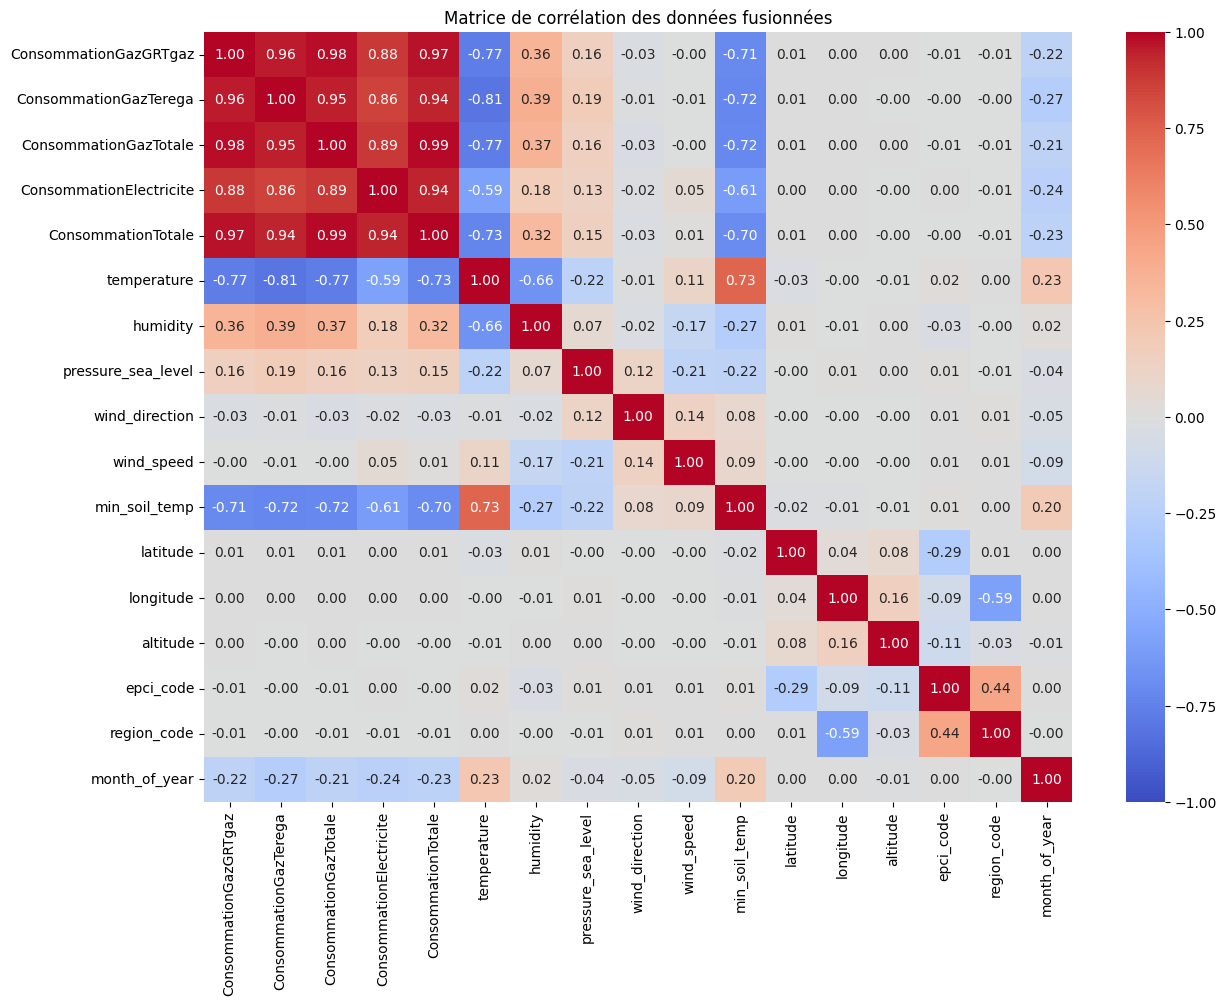

In [60]:
# Heatmap des corrélations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des données fusionnées")
plt.show()

##### Les variables ConsommationGazGRTgaz (0.97) et ConsommationElectricite (0.88) ont une forte corrélation avec ConsommationTotale, donc elles sont pertinentes pour la prédiction.
##### Les variables  temperature (-0.70) et min_soil_temp (-0.72) montrent une corrélation négative significative avec ConsommationTotale : lorsque la température augmente, la consommation diminue (logique pour le gaz en période chaude).
##### Les variables  latitude, longitude et altitude ont une corrélation très faible (proche de 0) et peuvent ne pas être directement pertinentes.